In [1]:
import os
import cv2
import numpy as np

def load_images_from_paths(image_paths):
    """
    Carrega imagens a partir de uma lista de caminhos e retorna uma lista de arrays numpy.

    Args:
        image_paths (list of str): Lista de caminhos para imagens.

    Returns:
        list: Lista de arrays numpy representando as imagens carregadas.
    """
    images = []
    for image_path in image_paths:
        abs_path = os.path.abspath(image_path)
        if not os.path.exists(abs_path):
            print(f"[ERRO] Arquivo não encontrado: {abs_path}")
            continue
        img = cv2.imread(abs_path)
        if img is not None:
            images.append(img)
        else:
            print(f"[ERRO] Falha ao carregar imagem (formato inválido?): {abs_path}")
    return images
# Defina o caminho para o diretório de imagens
paths = [
    '../defungi_dataset/BBH/H6_4b_4.jpg',
    '../defungi_dataset/GMA/H3_3a_10.jpg',
    '../defungi_dataset/SHC/H5_104a_2.jpg',
    '../defungi_dataset/BBH/H6_52a_13.jpg',
    '../defungi_dataset/GMA/H3_25a_2.jpg',
    '../defungi_dataset/BBH/H6_56b_2.jpg',
    '../defungi_dataset/TSH/H1_116b_11.jpg',
    '../defungi_dataset/SHC/H5_36a_4.jpg',
]

images = load_images_from_paths(paths)

    # Exiba o número de imagens carregadas
print(f"Total de imagens carregadas do diretório {paths}: {len(images)}")

# Exiba o número de imagens carregadas
print(f"Total de imagens carregadas: {len(images)}")

Total de imagens carregadas do diretório ['../defungi_dataset/BBH/H6_4b_4.jpg', '../defungi_dataset/GMA/H3_3a_10.jpg', '../defungi_dataset/SHC/H5_104a_2.jpg', '../defungi_dataset/BBH/H6_52a_13.jpg', '../defungi_dataset/GMA/H3_25a_2.jpg', '../defungi_dataset/BBH/H6_56b_2.jpg', '../defungi_dataset/TSH/H1_116b_11.jpg', '../defungi_dataset/SHC/H5_36a_4.jpg']: 8
Total de imagens carregadas: 8


In [2]:
import matplotlib.pyplot as plt
    
def plot_image_grid(images, nrows=None, ncols=None, size=128):
    if nrows is None:
        nrows = 1
    if ncols is None:
        ncols = len(images)

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(images):
            img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # BGR → RGB para mostrar corretamente
            ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [3]:
def increase_saturation(image, value=50):
    """
    Aumenta a saturação da imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        value (int): Valor a ser adicionado à saturação (0–255).

    Returns:
        np.ndarray: Imagem com saturação aumentada.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    # Adiciona valor com saturação limitada a 255
    s = np.clip(s.astype(np.int32) + value, 0, 255).astype(np.uint8)
    
    hsv_saturated = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv_saturated, cv2.COLOR_HSV2BGR)


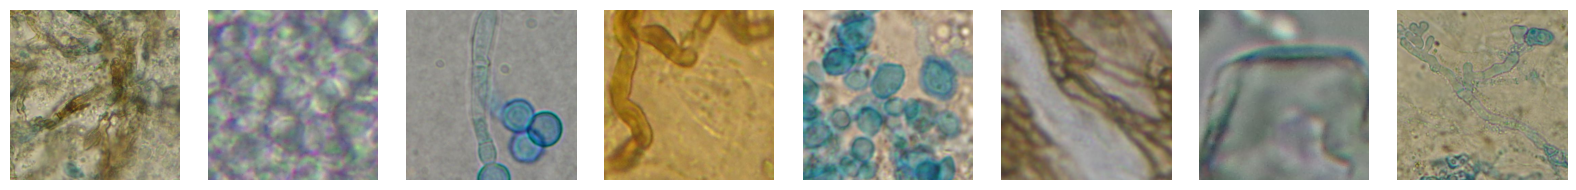

In [4]:
plot_image_grid(images=images)


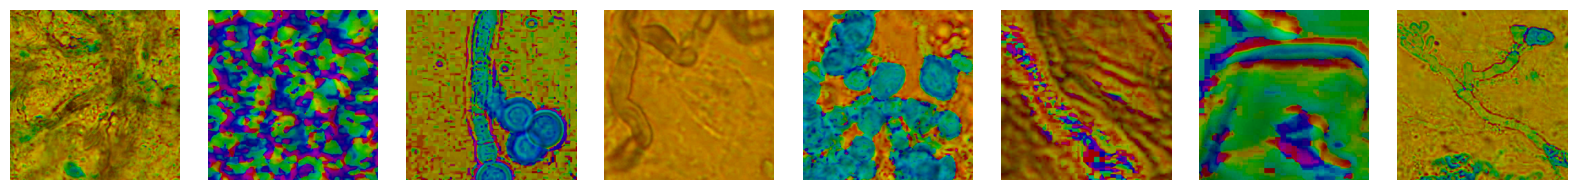

In [5]:
images_saturated = [increase_saturation(img, value=255) for img in images]
plot_image_grid(images=images_saturated)

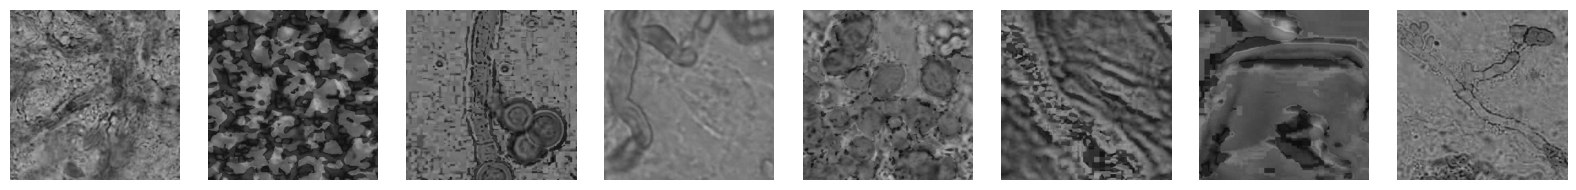

In [ ]:
images_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
plot_image_grid(images=images_gray, ncols=8, nrows=1)

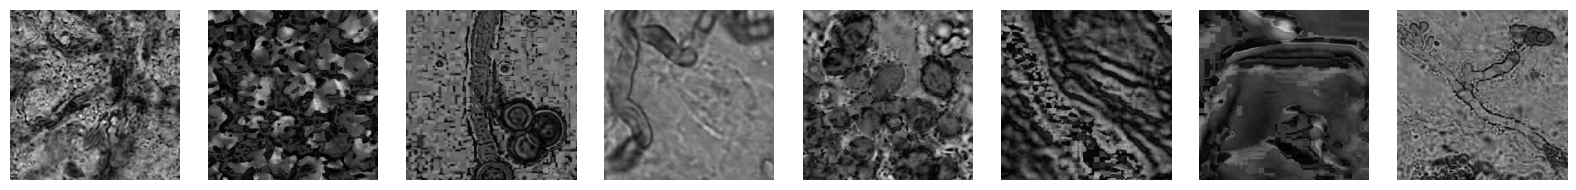

In [29]:
images_brightness_fix = [cv2.convertScaleAbs(image, alpha=1.7, beta=-90) for image in images_gray]
plot_image_grid(images=images_brightness_fix, ncols=8, nrows=1)

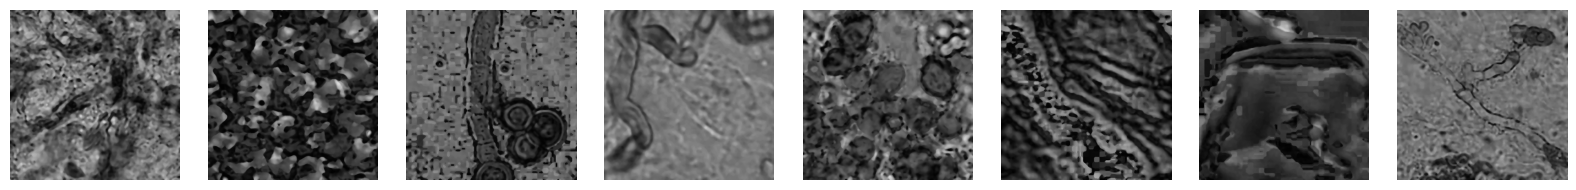

In [30]:
images_median_filtered = [cv2.medianBlur(image, ksize=7) for image in images_brightness_fix]
plot_image_grid(images=images_median_filtered)

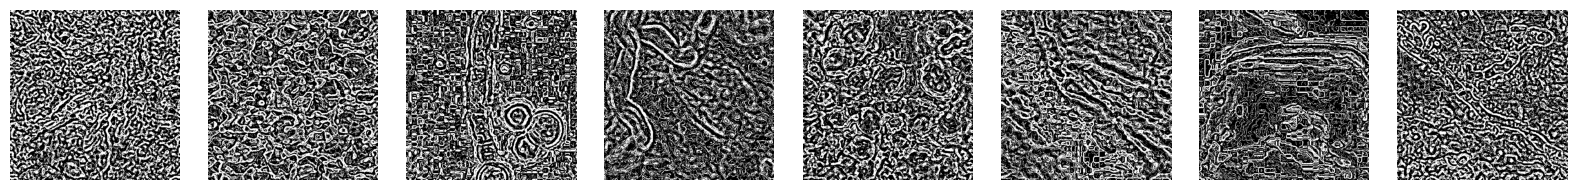

In [31]:
# Aplicar limiarização adaptativa
    # cv2.ADAPTIVE_THRESH_GAUSSIAN_C ou cv2.ADAPTIVE_THRESH_MEAN_C
    # cv2.THRESH_BINARY_INV para que o fundo claro vire preto e o objeto escuro vire branco
    # blockSize: Tamanho da vizinhança que o limiar adaptativo irá considerar (deve ser ímpar e > 1)
    # C: Constante subtraída da média ou média ponderada (você pode ajustar este valor, e.g., 2, 5, 10)
images_binary = [cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,7, 1) for img in images_median_filtered]
plot_image_grid(images=images_binary)

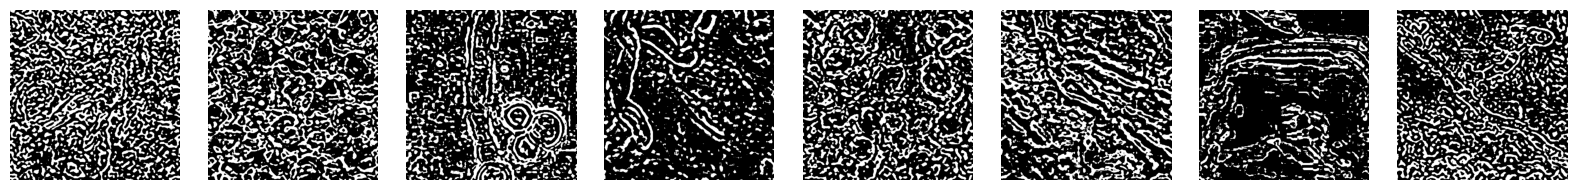

In [32]:
images_median_binared = [cv2.medianBlur(image, ksize=7) for image in images_binary]
plot_image_grid(images=images_median_binared)

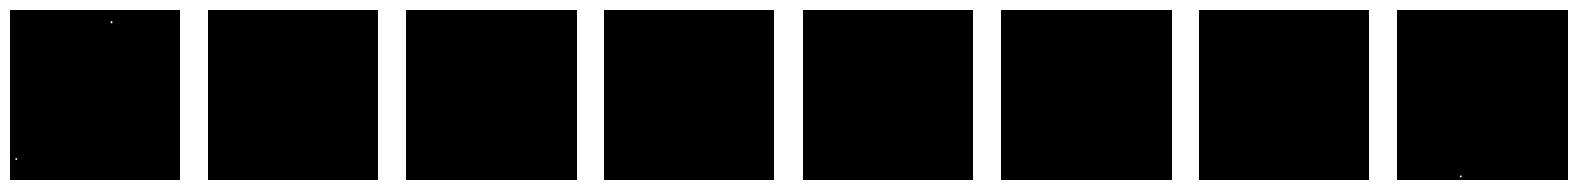

In [108]:
# Defina o kernel para a operação morfológica
kernel_open = np.ones((5,5), np.uint8) # Você pode ajustar o tamanho do kernel, e.g., (5,5)

# Aplica a operação de Abertura nas imagens binarizadas
images_opened = [cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel_open) for image in images_binary]
plot_image_grid(images=images_opened)

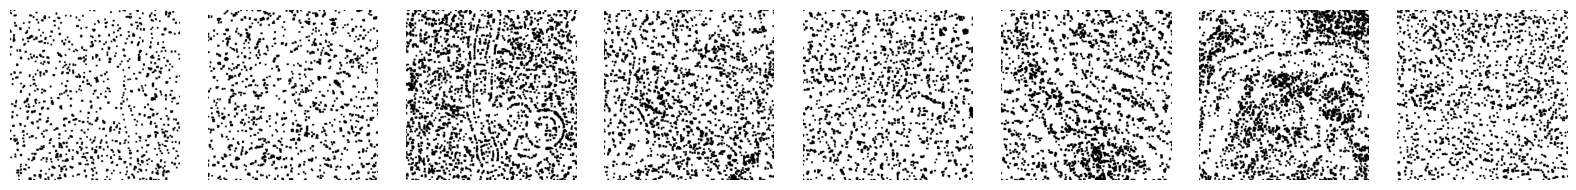

In [ ]:
# Defina o kernel para a operação morfológica
kernel_close = np.ones((5,5), np.uint8) # Você pode ajustar o tamanho do kernel, e.g., (5,5)

# Aplica a operação de Fechamento nas imagens após a abertura
images_closed = [cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_close) for image in images_opened]
plot_image_grid(images=images_closed)

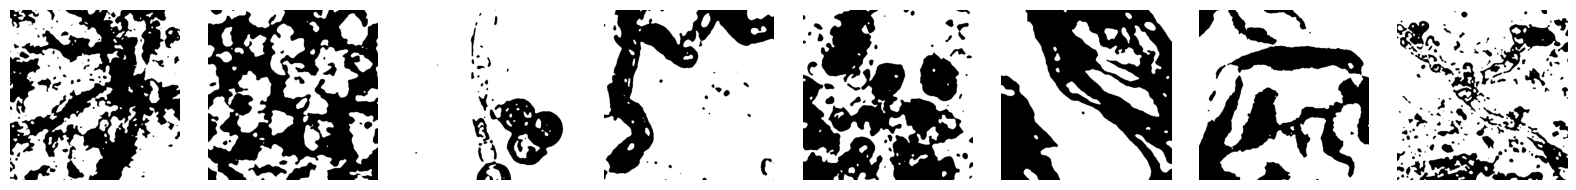

In [19]:
images_binary = [cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )[1] for img in images_median_filtered]
plot_image_grid(images=images_binary)

# Trabalho de processamento de dados

## Duplicação para pasta das imagens processadas

In [ ]:
#Duplicação para pasta das imagens processadas

def save_images_on_folder(images, folder_path):
    try:
        for i, img in enumerate(images):
            file_path = os.path.join(folder_path, f'image_{i}.png')
            cv2.imwrite(file_path, img)
            print(f"[INFO] Imagem salva em: {file_path}")
    except Exception as e:
        print(f"[ERRO] Falha ao salvar imagens: {e}")

def get_path_folder(folder_name):
    """
    Retorna o caminho absoluto para um diretório específico dentro do diretório atual.

    Args:
        folder_name (str): Nome do diretório.

    Returns:
        str: Caminho absoluto para o diretório.
    """
    dicionario = {
        "BASH" : "../processed_dataset/BASH",
        "BBH" : "../processed_dataset/BBH",
        "GMA" : "../processed_dataset/GMA",
        "SHC" : "../processed_dataset/SHC",
        "TSH" : "../processed_dataset/TSH"
    }
    resultado = dicionario[folder_name]
    return os.path

## Pré-processamento

### Load das imagens

In [13]:
import os
import cv2
import numpy as np

def load_images_from_paths(image_paths):
    """
    Carrega imagens a partir de uma lista de caminhos e retorna uma lista de arrays numpy.

    Args:
        image_paths (list of str): Lista de caminhos para imagens.

    Returns:
        list: Lista de arrays numpy representando as imagens carregadas.
    """
    images_2 = []
    for image_path in image_paths:
        abs_path = os.path.abspath(image_path)
        if not os.path.exists(abs_path):
            print(f"[ERRO] Arquivo não encontrado: {abs_path}")
            continue
        img = cv2.imread(abs_path)
        if img is not None:
            images.append(img)
        else:
            print(f"[ERRO] Falha ao carregar imagem (formato inválido?): {abs_path}")
    return images
# Defina o caminho para o diretório de imagens
paths = [
    '../defungi_dataset/BBH/H6_4b_4.jpg',
    '../defungi_dataset/GMA/H3_3a_10.jpg',
    '../defungi_dataset/SHC/H5_104a_2.jpg',
    '../defungi_dataset/BBH/H6_52a_13.jpg',
    '../defungi_dataset/GMA/H3_25a_2.jpg',
    '../defungi_dataset/BBH/H6_56b_2.jpg',
    '../defungi_dataset/TSH/H1_116b_11.jpg',
    '../defungi_dataset/SHC/H5_36a_4.jpg',
]

images_2 = load_images_from_paths(paths)

    # Exiba o número de imagens carregadas
print(f"Total de imagens carregadas do diretório {paths}: {len(images_2)}")

# Exiba o número de imagens carregadas
print(f"Total de imagens carregadas: {len(images_2)}")

Total de imagens carregadas do diretório ['../defungi_dataset/BBH/H6_4b_4.jpg', '../defungi_dataset/GMA/H3_3a_10.jpg', '../defungi_dataset/SHC/H5_104a_2.jpg', '../defungi_dataset/BBH/H6_52a_13.jpg', '../defungi_dataset/GMA/H3_25a_2.jpg', '../defungi_dataset/BBH/H6_56b_2.jpg', '../defungi_dataset/TSH/H1_116b_11.jpg', '../defungi_dataset/SHC/H5_36a_4.jpg']: 24
Total de imagens carregadas: 24


### Demonstração das imagens

In [14]:
import matplotlib.pyplot as plt
    
def plot_image_grid(images, nrows=None, ncols=None, size=128):
    if nrows is None:
        nrows = 1
    if ncols is None:
        ncols = len(images)

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(images):
            img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # BGR → RGB para mostrar corretamente
            ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

### Operações

In [15]:
def increase_saturation(image, value=50):
    """
    Aumenta a saturação da imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        value (int): Valor a ser adicionado à saturação (0–255).

    Returns:
        np.ndarray: Imagem com saturação aumentada.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    # Adiciona valor com saturação limitada a 255
    s = np.clip(s.astype(np.int32) + value, 0, 255).astype(np.uint8)
    
    hsv_saturated = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv_saturated, cv2.COLOR_HSV2BGR)

def go_gray_scale(image):
    """
    Converte a imagem para escala de cinza.

    Args:
        image (np.ndarray): Imagem em BGR.

    Returns:
        np.ndarray: Imagem convertida para escala de cinza.
    """
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def Lab_channel(image, channel='a'):
    """
    Extrai um canal específico do espaço de cores LAB.

    Args:
        image (np.ndarray): Imagem em BGR.
        channel (str): Canal a ser extraído ('a' ou 'b').

    Returns:
        np.ndarray: Canal extraído da imagem.
    """
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    if channel == 'a':
        return lab[:, :, 1]
    elif channel == 'b':
        return lab[:, :, 2]
    else:
        raise ValueError("Canal deve ser 'a' ou 'b'.")


def HSV_channel(image, channel='h'):
    """
    Extrai um canal específico do espaço de cores HSV.

    Args:
        image (np.ndarray): Imagem em BGR.
        channel (str): Canal a ser extraído ('h', 's' ou 'v').

    Returns:
        np.ndarray: Canal extraído da imagem.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    if channel == 'h':
        return hsv[:, :, 0]
    elif channel == 's':
        return hsv[:, :, 1]
    elif channel == 'v':
        return hsv[:, :, 2]
    else:
        raise ValueError("Canal deve ser 'h', 's' ou 'v'.")
    
def Hue_fix(image, value):
    """
    Aumenta o valor do canal Hue da imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        value (int): Valor a ser adicionado ao canal Hue (0–255).

    Returns:
        np.ndarray: Imagem com o canal Hue aumentado.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    # Adiciona valor com Hue limitado a 180
    h = np.clip(h.astype(np.int32) + value, 0, 180).astype(np.uint8)
    
    hsv_hue_fixed = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv_hue_fixed, cv2.COLOR_HSV2BGR)

def Luminosity_fix(image, value):
    """
    Aumenta o valor do canal de luminosidade da imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        value (int): Valor a ser adicionado ao canal de luminosidade (0–255).

    Returns:
        np.ndarray: Imagem com o canal de luminosidade aumentado.
    """
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    
    # Adiciona valor com luminosidade limitada a 255
    v = np.clip(v.astype(np.int32) + value, 0, 255).astype(np.uint8)
    
    hsv_luminosity_fixed = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv_luminosity_fixed, cv2.COLOR_HSV2BGR)

In [16]:
#Filtros Gaussiano e mediana
def gaussian_filter(image, ksize=(5, 5), sigma=0):
    """
    Aplica um filtro gaussiano na imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        ksize (tuple): Tamanho do kernel do filtro gaussiano.
        sigma (float): Desvio padrão do filtro gaussiano.

    Returns:
        np.ndarray: Imagem filtrada.
    """
    return cv2.GaussianBlur(image, ksize, sigma)

def median_filter(image, ksize=5):
    """
    Aplica um filtro de mediana na imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        ksize (int): Tamanho do kernel do filtro de mediana.

    Returns:
        np.ndarray: Imagem filtrada.
    """
    return cv2.medianBlur(image, ksize)




## Detecção de bordas

In [17]:
#Canny Edge Detection
def canny_edge_detection(image, low_threshold=100, high_threshold=200):
    """
    Aplica a detecção de bordas de Canny na imagem.

    Args:
        image (np.ndarray): Imagem em BGR.
        low_threshold (int): Limite inferior para a detecção de bordas.
        high_threshold (int): Limite superior para a detecção de bordas.

    Returns:
        np.ndarray: Imagem com as bordas detectadas.
    """
    return cv2.Canny(image, low_threshold, high_threshold)

# Limiarização
def threshold_otsu(image):
    """
    Aplica a limiarização de Otsu na imagem.

    Args:
        image (np.ndarray): Imagem em escala de cinza.

    Returns:
        np.ndarray: Imagem binarizada.
    """
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary_image

def adaptive_threshold(image, block_size=11, C=2):
    """
    Aplica a limiarização adaptativa na imagem.

    Args:
        image (np.ndarray): Imagem em escala de cinza.
        block_size (int): Tamanho do bloco para a limiarização adaptativa (deve ser ímpar).
        C (int): Constante subtraída da média ou média ponderada.

    Returns:
        np.ndarray: Imagem binarizada.
    """
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, block_size, C)

## Pós-processamento

In [18]:
def morphological_open(image, kernel_size=(5, 5)):
    """
    Aplica a operação de abertura morfológica na imagem.

    Args:
        image (np.ndarray): Imagem binarizada.
        kernel_size (tuple): Tamanho do kernel para a operação de abertura.

    Returns:
        np.ndarray: Imagem após a operação de abertura.
    """
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

def morphological_close(image, kernel_size=(5, 5)):
    """
    Aplica a operação de fechamento morfológico na imagem.

    Args:
        image (np.ndarray): Imagem binarizada.
        kernel_size (tuple): Tamanho do kernel para a operação de fechamento.

    Returns:
        np.ndarray: Imagem após a operação de fechamento.
    """
    kernel = np.ones(kernel_size, np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)



## Testes

### Teste 1

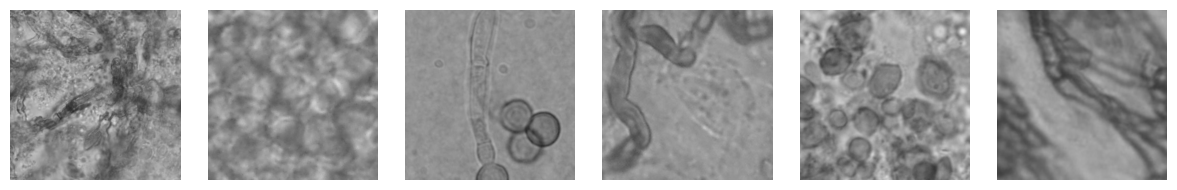

In [53]:
images_2_gray = [go_gray_scale(img) for img in images_2]
plot_image_grid(images=images_2_gray, ncols=6, nrows=1)

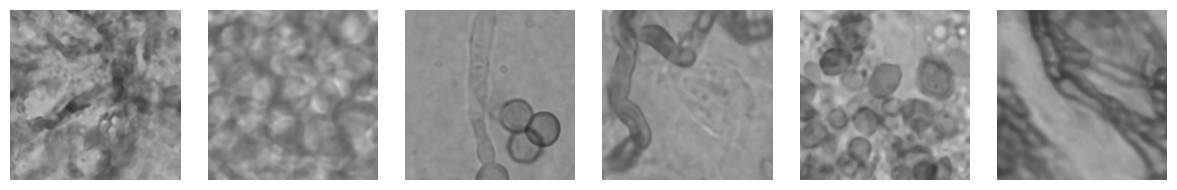

In [50]:
images_2_median = [median_filter(img, ksize=11) for img in images_2_gray]
plot_image_grid(images=images_2_median, ncols=6, nrows=1)

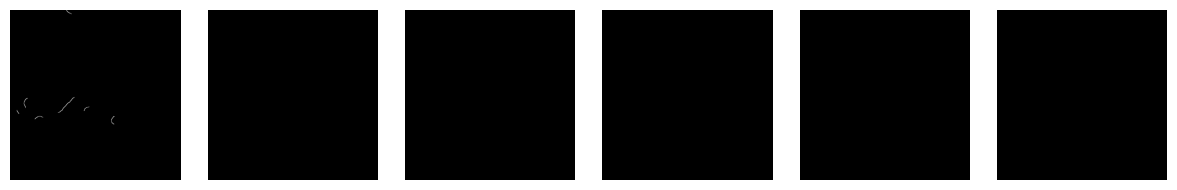

In [51]:
imagens_2_canny = [canny_edge_detection(img) for img in images_2_median]
plot_image_grid(images=imagens_2_canny, ncols=6, nrows=1)

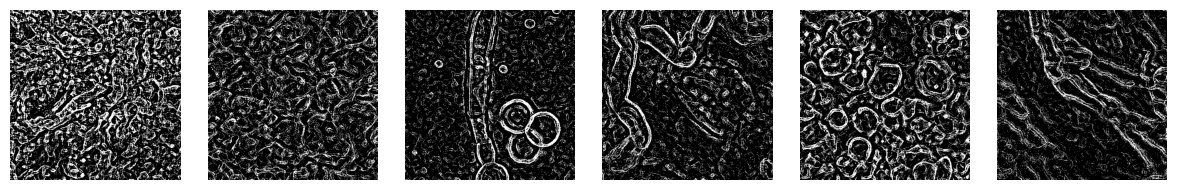

In [52]:
imagens_2_limiarized = [adaptive_threshold(img, block_size=7, C=1) for img in images_2_median]
plot_image_grid(images=imagens_2_limiarized, ncols=6, nrows=1)

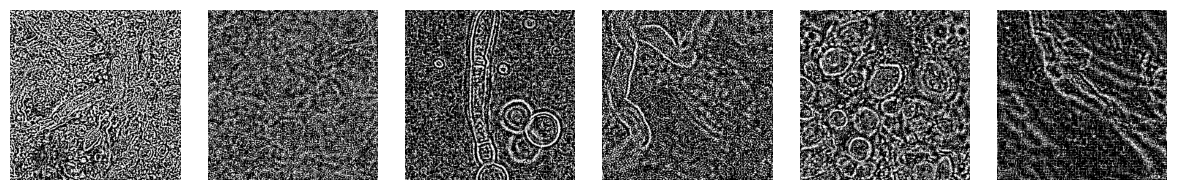

In [ ]:
imagens_2_gray_LIMI = [adaptive_threshold(img, block_size=7, C=1) for img in images_2_gray]
plot_image_grid(images=imagens_2_gray_LIMI, ncols=6, nrows=1)



### Teste 2